<a href="https://colab.research.google.com/github/parva-jain/CatsVsDogs-Classifier/blob/main/CatVsDog_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uploading dataset from kaggle

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"parv619","key":"fa53e5809bef53ee7878ee35c6ed24e9"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c dogs-vs-cats


 98% 534M/543M [00:07<00:00, 168MB/s]
100% 543M/543M [00:08<00:00, 71.2MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 78.8MB/s]
 97% 262M/271M [00:02<00:00, 131MB/s]
100% 271M/271M [00:02<00:00, 131MB/s]


Unzipping training and testing data

In [5]:
from zipfile import ZipFile
train_zip = 'train.zip'
test_zip = 'test1.zip'

zip_ref1 = ZipFile(train_zip, 'r')
zip_ref1.extractall()
zip_ref1.close()

zip_ref2 = ZipFile(test_zip, 'r')
zip_ref2.extractall()
zip_ref2.close()

Viewing Dog photos from the dataset

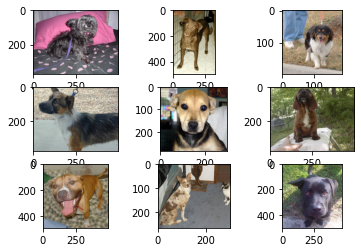

In [6]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'train/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'dog.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

Viewing Cat photos from the dataset

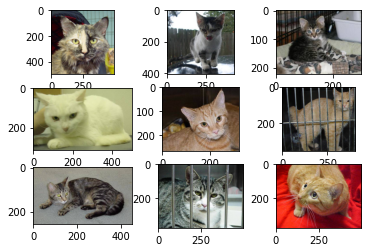

In [7]:
# plot cat photos from the dogs vs cats dataset

# define location of dataset
folder = 'train/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'cat.' + str(10 + i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

Arranging pictures in the respective directories

In [8]:
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
# create directories
dataset_home = 'dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['dogs/', 'cats/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.20
# copy training dataset images into subdirectories
src_directory = 'train/'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	dst_dir = 'train/'
	if random() < val_ratio:
		dst_dir = 'test/'
	if file.startswith('cat'):
		dst = dataset_home + dst_dir + 'cats/'  + file
		copyfile(src, dst)
	elif file.startswith('dog'):
		dst = dataset_home + dst_dir + 'dogs/'  + file
		copyfile(src, dst)

Model no.1 with simple CNN structure

In [9]:
import tensorflow as tf
model1 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

Model no.2 with regularization(Dropout layer) added to model no.1

In [10]:
model2 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [11]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [12]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)       

In [13]:
from tensorflow.keras.optimizers import RMSprop

model1.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

model2.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

Converting the dataset images into the format in which it can be feed into model for training and testing.

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 19910 images belonging to 2 classes.
Found 5090 images belonging to 2 classes.


Training the models

In [15]:
history1 = model1.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=15,
                              validation_steps=50,
                              verbose=2)

Epoch 1/15
100/100 - 8s - loss: 0.7673 - accuracy: 0.5380 - val_loss: 0.6679 - val_accuracy: 0.5940
Epoch 2/15
100/100 - 8s - loss: 0.6623 - accuracy: 0.6276 - val_loss: 0.6187 - val_accuracy: 0.6670
Epoch 3/15
100/100 - 8s - loss: 0.5957 - accuracy: 0.6885 - val_loss: 0.6107 - val_accuracy: 0.6810
Epoch 4/15
100/100 - 9s - loss: 0.5796 - accuracy: 0.7040 - val_loss: 0.5484 - val_accuracy: 0.7150
Epoch 5/15
100/100 - 8s - loss: 0.5651 - accuracy: 0.7195 - val_loss: 0.5075 - val_accuracy: 0.7350
Epoch 6/15
100/100 - 8s - loss: 0.5231 - accuracy: 0.7345 - val_loss: 0.5173 - val_accuracy: 0.7430
Epoch 7/15
100/100 - 8s - loss: 0.5320 - accuracy: 0.7370 - val_loss: 0.5809 - val_accuracy: 0.6900
Epoch 8/15
100/100 - 8s - loss: 0.5070 - accuracy: 0.7550 - val_loss: 0.5387 - val_accuracy: 0.7300
Epoch 9/15
100/100 - 8s - loss: 0.4908 - accuracy: 0.7635 - val_loss: 0.4853 - val_accuracy: 0.7610
Epoch 10/15
100/100 - 9s - loss: 0.4774 - accuracy: 0.7720 - val_loss: 0.5305 - val_accuracy: 0.7470

In [22]:
history2 = model2.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=15,
                              validation_steps=50,
                              verbose=2)

Epoch 1/15
100/100 - 9s - loss: 0.4361 - accuracy: 0.8040 - val_loss: 0.4545 - val_accuracy: 0.7990
Epoch 2/15
100/100 - 8s - loss: 0.3985 - accuracy: 0.8250 - val_loss: 0.4308 - val_accuracy: 0.8070
Epoch 3/15
100/100 - 8s - loss: 0.4348 - accuracy: 0.8035 - val_loss: 0.4856 - val_accuracy: 0.7920
Epoch 4/15
100/100 - 8s - loss: 0.4375 - accuracy: 0.7955 - val_loss: 0.4637 - val_accuracy: 0.7930
Epoch 5/15
100/100 - 8s - loss: 0.4229 - accuracy: 0.8126 - val_loss: 0.4840 - val_accuracy: 0.7940
Epoch 6/15
100/100 - 8s - loss: 0.4201 - accuracy: 0.8235 - val_loss: 0.4318 - val_accuracy: 0.8000
Epoch 7/15
100/100 - 8s - loss: 0.4170 - accuracy: 0.8175 - val_loss: 0.5091 - val_accuracy: 0.7700
Epoch 8/15
100/100 - 8s - loss: 0.3980 - accuracy: 0.8226 - val_loss: 0.4380 - val_accuracy: 0.7960
Epoch 9/15
100/100 - 8s - loss: 0.3887 - accuracy: 0.8250 - val_loss: 0.5541 - val_accuracy: 0.7650
Epoch 10/15
100/100 - 9s - loss: 0.4131 - accuracy: 0.8296 - val_loss: 0.5278 - val_accuracy: 0.7550

*Model 2 has slightly more accuracy than the model 1.
That's the effect of Dropout Regularization method*

Reading the titles of the images of the dataset

In [18]:
import os


train_dir = 'dataset_dogs_vs_cats/train/'
validation_dir = 'dataset_dogs_vs_cats/test/'

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.5892.jpg', 'cat.1860.jpg', 'cat.7256.jpg', 'cat.12404.jpg', 'cat.5989.jpg', 'cat.770.jpg', 'cat.10500.jpg', 'cat.2259.jpg', 'cat.11153.jpg', 'cat.2243.jpg']
['dog.6162.jpg', 'dog.11324.jpg', 'dog.11674.jpg', 'dog.6646.jpg', 'dog.9921.jpg', 'dog.5136.jpg', 'dog.907.jpg', 'dog.9099.jpg', 'dog.11552.jpg', 'dog.3243.jpg']


Viewing the layers of the CNN 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in true_divide


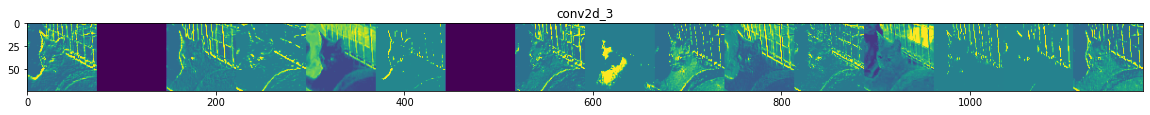

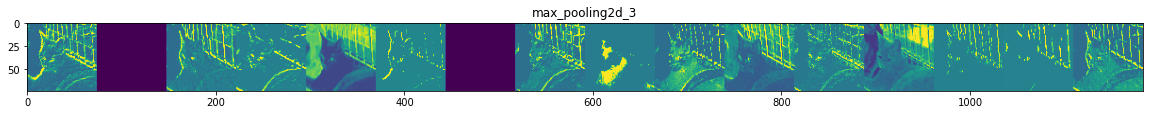

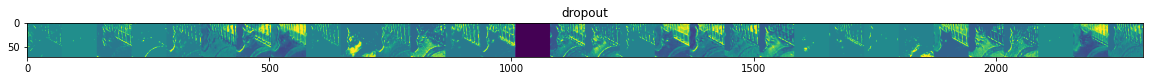

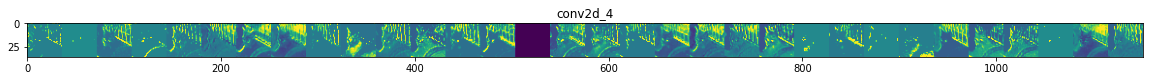

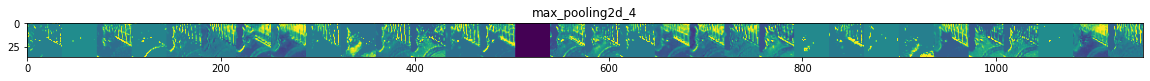

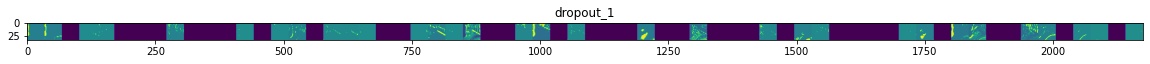

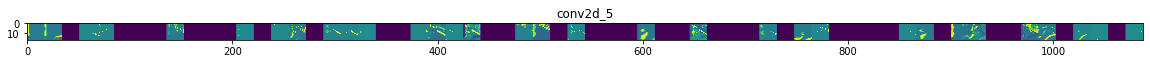

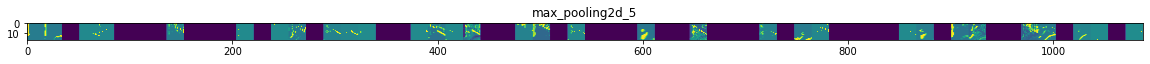

In [20]:
import numpy as np
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model2.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model2.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model2.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

Plotting the Training and Testing Accuracy as well as Loss

Model 2

Text(0.5, 1.0, 'Training and validation loss')

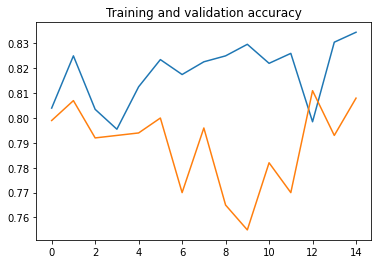

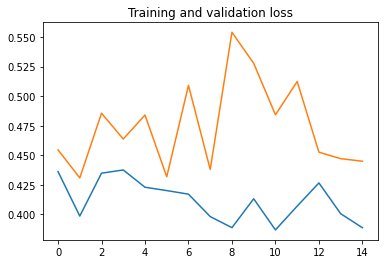

In [23]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history2.history[     'accuracy' ]
val_acc  = history2.history[ 'val_accuracy' ]
loss     = history2.history[    'loss' ]
val_loss = history2.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

Model 1

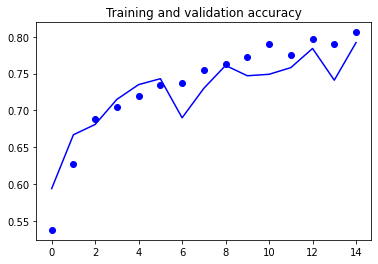

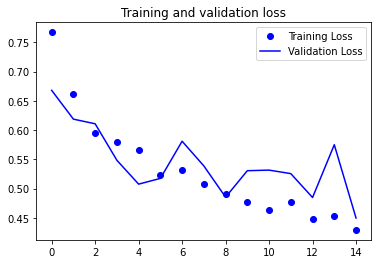

In [26]:
import matplotlib.pyplot as plt
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Applying Data Augmentation

In [27]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history3 = model2.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Found 19910 images belonging to 2 classes.
Found 5090 images belonging to 2 classes.
Epoch 1/15
100/100 - 17s - loss: 0.5959 - accuracy: 0.7050 - val_loss: 0.4918 - val_accuracy: 0.7530
Epoch 2/15
100/100 - 17s - loss: 0.5773 - accuracy: 0.7005 - val_loss: 0.4680 - val_accuracy: 0.7760
Epoch 3/15
100/100 - 17s - loss: 0.5619 - accuracy: 0.7025 - val_loss: 0.4638 - val_accuracy: 0.8050
Epoch 4/15
100/100 - 17s - loss: 0.5593 - accuracy: 0.7190 - val_loss: 0.4655 - val_accuracy: 0.7860
Epoch 5/15
100/100 - 17s - loss: 0.5671 - accuracy: 0.7180 - val_loss: 0.4664 - val_accuracy: 0.7990
Epoch 6/15
100/100 - 17s - loss: 0.5664 - accuracy: 0.7240 - val_loss: 0.4539 - val_accuracy: 0.8040
Epoch 7/15
100/100 - 17s - loss: 0.5584 - accuracy: 0.7210 - val_loss: 0.5317 - val_accuracy: 0.7510
Epoch 8/15
100/100 - 17s - loss: 0.5573 - accuracy: 0.7315 - val_loss: 0.4594 - val_accuracy: 0.7860
Epoch 9/15
100/100 - 17s - loss: 0.5553 - accuracy: 0.7220 - val_loss: 0.4358 - val_accuracy: 0.7940
Epoch 

Text(0.5, 1.0, 'Training and validation loss')

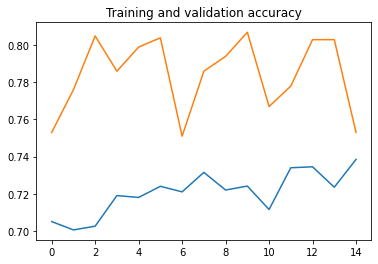

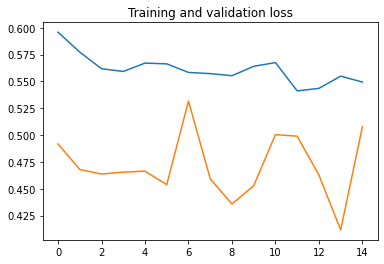

In [28]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history3.history[     'accuracy' ]
val_acc  = history3.history[ 'val_accuracy' ]
loss     = history3.history[    'loss' ]
val_loss = history3.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

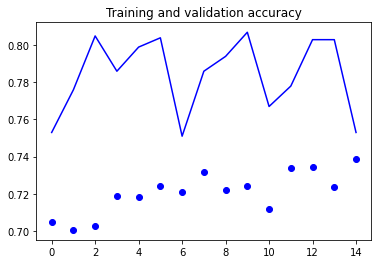

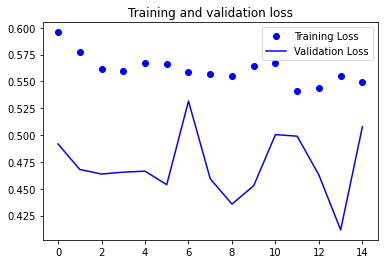

In [29]:
import matplotlib.pyplot as plt
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Applying Transfer Learning

Downloading the Inception model and weights of the model

All the methods with 1 is having the weights for the Inception models trained on huge Imagenet Dataset whereas others with 2 only have the architecture of Inception model but the weights will be trained on the current dataset

In [49]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model1 = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model2 = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model1.load_weights(local_weights_file)

for layer in pre_trained_model1.layers:
  layer.trainable = False
  
# pre_trained_model.summary()

last_layer1 = pre_trained_model1.get_layer('mixed7')
print('last layer output shape of 1: ', last_layer1.output_shape)
last_output1 = last_layer1.output

last_layer2 = pre_trained_model2.get_layer('mixed7')
print('last layer output shape of 2: ', last_layer2.output_shape)
last_output2 = last_layer2.output

--2020-11-20 13:39:52--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   241MB/s    in 0.3s    

2020-11-20 13:39:52 (241 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

last layer output shape of 1:  (None, 7, 7, 768)
last layer output shape of 2:  (None, 7, 7, 768)


Adding Dense layer at the end of Inception model

In [50]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x1 = layers.Flatten()(last_output1)
x2 = layers.Flatten()(last_output2)

# Add a fully connected layer with 1,024 hidden units and ReLU activation
x1 = layers.Dense(1024, activation='relu')(x1)
x2 = layers.Dense(1024, activation='relu')(x2)

# Add a dropout rate of 0.2
x1 = layers.Dropout(0.2)(x1) 
x2 = layers.Dropout(0.2)(x2)                  

# Add a final sigmoid layer for classification
x1 = layers.Dense  (1, activation='sigmoid')(x1)     
x2 = layers.Dense  (1, activation='sigmoid')(x2)           


model3 = Model( pre_trained_model1.input, x1) 
model4 = Model( pre_trained_model2.input, x2) 

model3.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

model4.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [51]:
model3.summary()

Model: "functional_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_570 (Conv2D)             (None, 74, 74, 32)   864         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_564 (BatchN (None, 74, 74, 32)   96          conv2d_570[0][0]                 
__________________________________________________________________________________________________
activation_564 (Activation)     (None, 74, 74, 32)   0           batch_normalization_564[0][0]    
______________________________________________________________________________________

In [52]:
model4.summary()

Model: "functional_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_664 (Conv2D)             (None, 74, 74, 32)   864         input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_658 (BatchN (None, 74, 74, 32)   96          conv2d_664[0][0]                 
__________________________________________________________________________________________________
activation_658 (Activation)     (None, 74, 74, 32)   0           batch_normalization_658[0][0]    
______________________________________________________________________________________

Defining Custom Callback 

In [53]:
# Define a Callback class that stops training once accuracy reaches 99.0%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99.0% accuracy so cancelling training!")
      self.model.stop_training = True

callback = myCallback()

In [54]:
history4 = model3.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            callbacks = [callback],
            verbose = 2)



Epoch 1/20
100/100 - 20s - loss: 0.3388 - accuracy: 0.8680 - val_loss: 0.1446 - val_accuracy: 0.9460
Epoch 2/20
100/100 - 19s - loss: 0.2277 - accuracy: 0.9180 - val_loss: 0.1170 - val_accuracy: 0.9600
Epoch 3/20
100/100 - 19s - loss: 0.2683 - accuracy: 0.9030 - val_loss: 0.1640 - val_accuracy: 0.9400
Epoch 4/20
100/100 - 19s - loss: 0.2409 - accuracy: 0.9150 - val_loss: 0.1009 - val_accuracy: 0.9630
Epoch 5/20
100/100 - 19s - loss: 0.1854 - accuracy: 0.9345 - val_loss: 0.1057 - val_accuracy: 0.9640
Epoch 6/20
100/100 - 19s - loss: 0.2176 - accuracy: 0.9205 - val_loss: 0.0748 - val_accuracy: 0.9720
Epoch 7/20
100/100 - 19s - loss: 0.2024 - accuracy: 0.9245 - val_loss: 0.1249 - val_accuracy: 0.9610
Epoch 8/20
100/100 - 19s - loss: 0.2150 - accuracy: 0.9210 - val_loss: 0.1505 - val_accuracy: 0.9640
Epoch 9/20
100/100 - 19s - loss: 0.1752 - accuracy: 0.9415 - val_loss: 0.1100 - val_accuracy: 0.9720
Epoch 10/20
100/100 - 19s - loss: 0.1708 - accuracy: 0.9430 - val_loss: 0.1494 - val_accura

Text(0.5, 1.0, 'Training and validation loss')

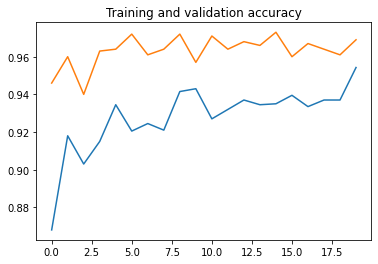

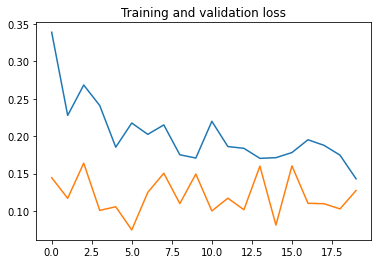

In [55]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history4.history[     'accuracy' ]
val_acc  = history4.history[ 'val_accuracy' ]
loss     = history4.history[    'loss' ]
val_loss = history4.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [57]:
history5 = model4.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 100,
            validation_steps = 50,
            callbacks = [callback],
            verbose = 2)

Epoch 1/100
100/100 - 20s - loss: 0.4967 - accuracy: 0.7520 - val_loss: 0.5138 - val_accuracy: 0.7540
Epoch 2/100
100/100 - 20s - loss: 0.5162 - accuracy: 0.7583 - val_loss: 0.4581 - val_accuracy: 0.7920
Epoch 3/100
100/100 - 20s - loss: 0.4948 - accuracy: 0.7785 - val_loss: 0.4254 - val_accuracy: 0.7920
Epoch 4/100
100/100 - 20s - loss: 0.4763 - accuracy: 0.7800 - val_loss: 0.4199 - val_accuracy: 0.8090
Epoch 5/100
100/100 - 20s - loss: 0.4753 - accuracy: 0.7755 - val_loss: 0.5097 - val_accuracy: 0.7520
Epoch 6/100
100/100 - 20s - loss: 0.4741 - accuracy: 0.7860 - val_loss: 0.4378 - val_accuracy: 0.8250
Epoch 7/100
100/100 - 20s - loss: 0.4733 - accuracy: 0.7820 - val_loss: 0.4331 - val_accuracy: 0.8040
Epoch 8/100
100/100 - 20s - loss: 0.4600 - accuracy: 0.7850 - val_loss: 0.6746 - val_accuracy: 0.7570
Epoch 9/100
100/100 - 20s - loss: 0.4611 - accuracy: 0.7810 - val_loss: 0.5165 - val_accuracy: 0.8310
Epoch 10/100
100/100 - 20s - loss: 0.4519 - accuracy: 0.8015 - val_loss: 0.7987 - 

Text(0.5, 1.0, 'Training and validation loss')

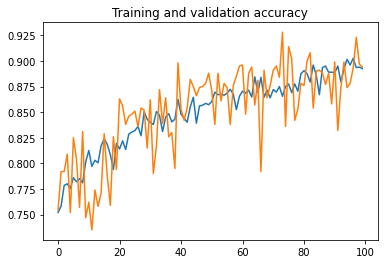

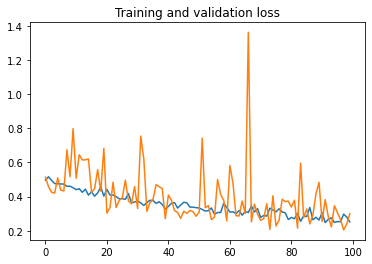

In [58]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history5.history[     'accuracy' ]
val_acc  = history5.history[ 'val_accuracy' ]
loss     = history5.history[    'loss' ]
val_loss = history5.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )